# 10. 케라스를 사용한 인공 신경망 소개
## 10.1 생물학적 뉴런에서 인공 뉴런까지
### 10.1.1 생물학적 뉴런
### 10.1.2 뉴런을 사용한 논리 연산
### 10.1.3 퍼셉트론

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris-setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3,1]]
y_pred = per_clf.predict(X_new) # 두 꽃에 대한 예측은 True와 False
print(y_pred)

[ True False]


### 10.1.4 다층 퍼셉트론과 역전파
### 10.1.5 회귀를 위한 다층 퍼셉트론

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(rmse)

0.5053326657967822


c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- 회귀 MLP의 전형적인 구조

| 하이퍼 파라미터 | 일반적인 값 |
| :------: | :------ |
| 은닉 층 수 | 문제에 따라 다름(일반적으로 1~5)|
| 은닉층 뉴런 수 | 문제에 따라 다름(일반적으로 10~100) |
| 출력 뉴런 수 | 예측 차원마다 하나 |
| 은닉 층의 활성화함수 | ReLU |
| 출력 층의 활성화함수 | 없음. 또는 (출력이 양수일 때)ReLU / 소프트 플러스나 (출력을 특정 범위로 제한할 때) 로지스틱 / tanh를 사용 |
| 손실 함수 | MSE 또는 (이상치가 있다면) 후버 |

### 10.1.6 분류를 위한 다층 퍼셉트론
- 분류 MLP의 전형적인 구조

| 하이퍼 파라미터 | 이진 분류 | 다중 레이블 분류 | 다중 분류 | 
| :------: | :---: | :---: | :---: |
| 은닉 층 수 | 문제에 따라 다름(일반적으로 1~5 사이) | .. | .. |
| 출력 뉴런 수 | 1개 | 이진 레이블마다 1개 | 클래스마다 1개 |
| 출력 층의 활성화 함수 | 시그모이드 함수 | 시그모이드 함수 | 소프트맥스 함수 |
| 손실 함수 | 크로스 엔트로피 | 크로스 엔트로피 | 크로스 엔트로피 |

## 10.2 케라스로 다층 퍼셉트론 구현하기
### 10.2.1 시퀀셜 API로 이미지 분류기 만들기
- 케라스로 데이터셋 적재하기

In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
print(X_train.shape)
print(X_train.dtype)

(55000, 28, 28)
uint8


In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255. , X_test / 255.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Ankle boot'

In [5]:
# 시퀀셜 API로 모델 만들기
# 1. 랜덤 시드 설정
tf.random.set_seed(42)
# 2. Sequential 모델 생성
model = tf.keras.Sequential()
# 3. 입력 층을 만들어 모델에 추가 샘플의 크기만 담음
model.add(tf.keras.layers.Input(shape=[28, 28]))
# 4. Flatten 층 추가 각 입력 이미지를 1차원 배열로 변환
model.add(tf.keras.layers.Flatten())
# 5. 뉴런 300개를 가진 Dense층 추가, ReLU
model.add(tf.keras.layers.Dense(300, activation='relu'))
# 6. 얘도 ReLU
model.add(tf.keras.layers.Dense(100, activation='relu'))
# 7. 뉴런 10개를 가진 출력 층, Softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
# 위와 같은 코드
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
print(model.layers)

[<Flatten name=flatten_1, built=True>, <Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]


In [9]:
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer('dense_5') is hidden1)

dense_3
False


In [10]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.07427862,  0.06086814, -0.06623831, ..., -0.05383354,
        -0.00240738,  0.0231621 ],
       [-0.04200137, -0.06060195,  0.06622456, ..., -0.02650929,
         0.06588878,  0.02938859],
       [ 0.07205781,  0.04960769,  0.06918785, ..., -0.00624011,
         0.0087291 , -0.06276458],
       ...,
       [ 0.03508892, -0.02782023, -0.04347899, ..., -0.05593865,
        -0.02722936,  0.06788577],
       [-0.07410028,  0.01115372, -0.04178382, ...,  0.01431792,
         0.07408482,  0.05000805],
       [ 0.0397689 , -0.04546556, -0.0447939 , ...,  0.03444909,
        -0.03723447, -0.02908396]], dtype=float32)

In [11]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
# 모델 훈련과 평가
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.6791 - loss: 1.0057 - val_accuracy: 0.8340 - val_loss: 0.5023
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8267 - loss: 0.5088 - val_accuracy: 0.8426 - val_loss: 0.4540
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.8427 - loss: 0.4569 - val_accuracy: 0.8496 - val_loss: 0.4295
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.8524 - loss: 0.4265 - val_accuracy: 0.8522 - val_loss: 0.4137
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8597 - loss: 0.4046 - val_accuracy: 0.8542 - val_loss: 0.4014
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.8650 - loss: 0.3879 - val_accuracy: 0.8568 - val_loss: 0.3944
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.8700 - loss: 0.3738 - val_accuracy: 0.8602 - val_loss: 0.3861
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8746 - los

C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SSAFY\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


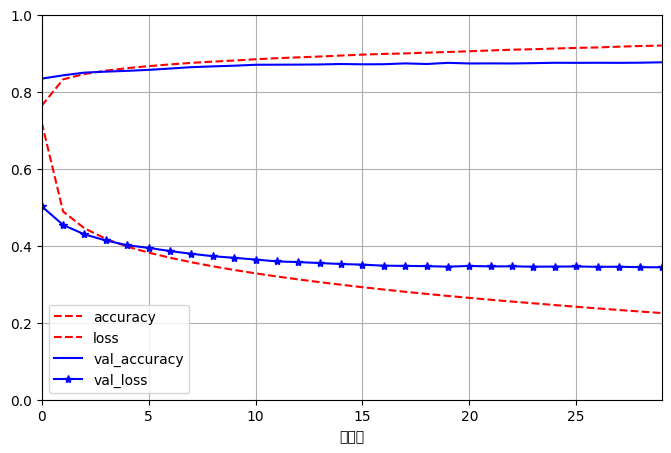

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29],ylim=[0, 1], grid=True, xlabel='에포크', style=['r--', 'r--', 'b-', 'b-*'])
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.8744 - loss: 0.3620


[0.3627108037471771, 0.8738999962806702]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.01, 0.  , 0.77],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [16]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [17]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [18]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 10.2.2 시퀀셜 API로 회귀용 다층 퍼셉트론 만들기

In [19]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
  norm_layer,
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - RootMeanSquaredError: 3.0976 - loss: 9.7063 - val_RootMeanSquaredError: 2.9036 - val_loss: 8.4308
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 2.8855 - loss: 8.3260 - val_RootMeanSquaredError: 2.8997 - val_loss: 8.4085
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 2.8797 - loss: 8.2929 - val_RootMeanSquaredError: 2.9005 - val_loss: 8.4131
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 2.8778 - loss: 8.2818 - val_RootMeanSquaredError: 2.9003 - val_loss: 8.4116
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 2.8767 - loss: 8.2753 - val_RootMeanSquaredError: 2.8980 - val_loss: 8.3987
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError: 2.8758 - loss: 8.2706 - val_RootMeanSquaredError: 2.8958 - val_loss: 8.3859
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - RootMeanSquaredError

### 10.2.3 함수형 API로 복잡한 모델 만들기

In [41]:
# 1. 데이터 로드
housing = fetch_california_housing()

# 2. 훈련, 검증, 테스트 세트로 분할
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# 3. 특성 스케일링 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [20]:
# 1. 5개의 층 생성
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)
# 2. input 객체 생성 모델이 받을 입력의 종류에 대한 사양, input과 dtype 매개변수를 가짐
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
# 3. Normalization 층을 함수처럼 사용해 Input 객체 전달
normalized = normalization_layer(input_)
# 4. 은닉층 2개 통과
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
# 5. 입력과 두 번째 은닉층의 출력을 연결
concat = concat_layer([normalized, hidden2])
# 6. output_layer로 전달해 최종 output을 얻음
output = output_layer(concat)

model = tf.keras.Model(inputs = [input_], outputs = [output])

In [44]:
# 모델 구성
input_wide = tf.keras.layers.Input(shape=[5])  # 0부터 4까지
input_deep = tf.keras.layers.Input(shape=[6])  # 2부터 7까지

# 정규화 레이어
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

# 입력에 정규화 적용
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

# 은닉층 구성
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

# wide와 deep 부분을 병합
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

# 출력층
output = tf.keras.layers.Dense(1)(concat)

# 모델 정의
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data = ((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20


c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\optimizers\base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


ValueError: For a model with multiple outputs, when providing the `metrics` argument as a list, it should have as many entries as the model has outputs. Received:
metrics=['RootMeanSquaredError']
of length 1 whereas the model has 2 outputs.

In [46]:
# 보조 출력층
aux_output = tf.keras.layers.Dense(1)(hidden2)

# 모델 정의(보조 출력)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [49]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse', 'mse'), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [50]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
  (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
  validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - dense_29_RootMeanSquaredError: 1.5454 - dense_29_loss: 2.2560 - dense_31_RootMeanSquaredError: 1.7275 - dense_31_loss: 0.3063 - loss: 2.5623 - val_dense_29_RootMeanSquaredError: 0.7439 - val_dense_29_loss: 0.4989 - val_dense_31_RootMeanSquaredError: 0.9236 - val_dense_31_loss: 0.0855 - val_loss: 0.5833
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - dense_29_RootMeanSquaredError: 0.6909 - dense_29_loss: 0.4297 - dense_31_RootMeanSquaredError: 0.8252 - dense_31_loss: 0.0681 - loss: 0.4978 - val_dense_29_RootMeanSquaredError: 0.6709 - val_dense_29_loss: 0.4057 - val_dense_31_RootMeanSquaredError: 0.8014 - val_dense_31_loss: 0.0643 - val_loss: 0.4693
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - dense_29_RootMeanSquaredError: 0.6452 - dense_29_loss: 0.3748 - dense_31_RootMeanSquaredError: 0.7457 - dense_31_loss: 0.0556 - loss: 0.4304 - val_dense_29_RootMeanSquaredError: 0.6464 - val_dense_29_loss: 0.3766 - val_dense

In [51]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - dense_29_RootMeanSquaredError: 0.5747 - dense_29_loss: 0.2974 - dense_31_RootMeanSquaredError: 0.6274 - dense_31_loss: 0.0394 - loss: 0.3368


In [52]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


### 10.2.4 서브클래싱 API로 동적 모델 만들기

In [62]:
from tensorflow import keras
import tensorflow as tf
# 커스텀 모델 정의
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)  # 모델에 이름을 부여하기 위해 필요
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

### 10.2.5 모델 저장과 복원하기

In [64]:
model.save('my_keras_model.keras')

c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\saving\saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [65]:
model = tf.keras.models.load_model('my_keras_model.keras')
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

TypeError: Could not locate class 'WideAndDeepModel'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': None, 'class_name': 'WideAndDeepModel', 'config': {'name': 'my_cool_model', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}}, 'registered_name': 'WideAndDeepModel'}

### 10.2.6 콜백 사용하기

In [70]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5', save_weights_only=True)
# history = model.fit([...], callbacks=[checkpoint_cb])

In [71]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# history = model.fit([...], callbacks=[checkpoint_cb, early_stopping_cb])

In [72]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    ratio = logs['val_loss'] / logs['loss']
    print(f'Epoch={epoch}, val/train={ratio:2f}')

### 10.2.7 텐서보드로 시각화하기

In [73]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='my_logs'):
  return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [74]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
# history = model.fit([...], callbacks=[tensorboard_cb])

In [75]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs

In [78]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
  for step in range(1, 1000 + 1):
    tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
    
    data = (np.random.randn(100) + 2)*step / 100 # 점점 커집니다.
    tf.summary.histogram("my_hist", data, buckets=50, step=step)
    
    images = np.random.randn(2, 32, 32, 3) * step / 1000 # 점점 밝아집니다.
    tf.summary.image('my_images', images, step=step)
    
    texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
    tf.summary.text('my_text', texts, step=step)
    
    sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
    audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
    tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

## 10.3 신경망 하이퍼 파라미터 튜닝하기

# Tensorflow

- 구글에서 개발한 수치 계산과 대규모 머신러닝을 위한 오픈소스 라이브러리
- CPU/GPU 모드가 있는데, GPU 모드는 NVIDIA의 그래픽 카드가 없으면 사용할 수 없음
- GPU 모드는 CPU의 성능이 아닌 GPU의 성능이 중요

## 텐서플로우가 제공하는 것
- 핵심 구조는 numpy와 비슷, GPU를 지원
- (여러 장치와 서버에 대해)분산 컴퓨팅을 지원
- JIT 컴파일러 포함. 속도를 높이고 메모리 사용량을 줄이기 위해 계산 최적화
    - 파이썬 함수에서 계산 그래프를 추출한 후 최적화(가지치기) 효율적으로 실행. 
    - 독립적인 연산을 자동으로 병렬 실행
- 계산 그래프는 플랫폼에 중립적인 포맷으로 내보낼 수 있으므로 한 환경에서 텐스플로 모델을 훈련하고 다른 환경에서 실행 가능
- 텐서플로는 후진 모드 자동 미분 기능과 RMSProp, Nadam과 같은 고성능 옵티마이저를 제공하므로 모든 종류의 손실함수 쉽게 최소화

### 참고 사이트
- [TFX](https://tensorflow.org/tfx) 
- [텐서플로 모델 저장소](https://github.com/tensorflow/models) 
- [텐서플로 리소스 페이지](https://www.tensorflow.org/resources) : 텐서플로 기반 프로젝트
- [텐서플로 기반 프로젝트](https://github.com/jtoy/awesome-tensorflow)
- [스택오버플로](https://stackoverflow.com) : 기술적인 질문 시
- [텐서플로 깃허브](https://github.com/tensorflow/tensorflow) : 버그를 알리거나 새 기능 요청
- [텐서플로 포럼](https://discuss.tensorflow.org) : 일반적인 이야기

## Tensor
- Tensorflow의 기본 데이터 구조, 다차원 배열. 데이터는 텐서로 표현됨
- ndarray(numpy의 다차원 배열)
- 스칼라 값도 가질 수 있음(42 같은 단순한 값)
-사용자 정의 손실 함수, 사용자 정의 지표, 사용자 정의 층 등을 만들 때 중요. 



In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


c:\Users\SSAFY\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.8604 - loss: 0.4806
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.9553 - loss: 0.1509
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.9669 - loss: 0.1104
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9718 - loss: 0.0890
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.9777 - loss: 0.0711
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.9721 - loss: 0.0920


[0.07621729373931885, 0.9768000245094299]

# 12.2. 넘파이와 텐서플로
## 12.2.1. 텐서와 연산
- tf.constant()로 텐서 생성 가능, 2행 3열의 실수 행렬을 나타내는 텐서

In [3]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

- tf.Tensor는 크기(shape)와 데이터 타입(dtype)을 가짐

In [4]:
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

In [6]:
# 인덱스 참조
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1, tf.newaxis] # 1열을 추출

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

- 모든 종류의 텐서 연산이 가능

In [8]:
t + 10
# tf.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
tf.square(t) # 원소들을 제곱

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t @ tf.transpose(t) # 행렬곱 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [11]:
import numpy as np
a = np.array([[2,3,4],[4,5,6]])
b = np.array([[1,3],[4,5],[6,7]])
a @ b

array([[38, 49],
       [60, 79]])

- 스칼라 값을 가지는 텐서, 이 경우 크기는 비어 있음

In [12]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

### 텐서플로가 제공하는 연산
#### 기본 수학 연산

- `tf.add()`
  - 두 텐서를 요소별로 더함
  - **Example:** `tf.add(x, y)`

- `tf.multiply()`
  - 두 텐서를 요소별로 곱함
  - **Example:** `tf.multiply(x, y)`

- `tf.square()`
  - 텐서의 각 요소를 제곱함
  - **Example:** `tf.square(x)`

- `tf.exp()`
  - 텐서의 각 요소에 대해 자연로그 밑 e의 지수 함수를 계산
  - **Example:** `tf.exp(x)`

- `tf.sqrt()`
  - 텐서의 각 요소에 대해 제곱근을 계산
  - **Example:** `tf.sqrt(x)`

#### numpy 제공 연산

- `tf.reshape()`
  - 텐서를 지정된 모양으로 재구성
  - **Example:** `tf.reshape(x, shape)`

- `tf.squeeze()`
  - 텐서에서 크기가 1인 차원을 제거
  - **Example:** `tf.squeeze(x)`

- `tf.tile()`
  - 텐서를 지정된 횟수만큼 반복
  - **Example:** `tf.tile(x, multiples)`

#### numpy와 이름이 다른 연산

- `tf.reduce_mean() = np.mean()`
  - 텐서의 요소들에 대한 평균을 계산
  - **Example:** `tf.reduce_mean(x)`

- `tf.reduce_sum() = np.sum()`
  - 텐서의 요소들에 대한 합을 계산
  - **Example:** `tf.reduce_sum(x)`

- `tf.reduce_max() = np.max()`
  - 텐서의 요소들 중 최대값을 계산
  - **Example:** `tf.reduce_max(x)`

- `tf.math.log() = np.log()`
  - 텐서의 각 요소에 대해 자연로그를 계산
  - **Example:** `tf.math.log(x)`

## 12.2.2. 텐서와 넘파이
- numpy 배열로 텐서를 만들 수 있고, 그 반대도 가능
- numpy 배열에 텐서플로 연산을 적용할 수 있고 텐서에 numpy 연산을 적용 가능

In [13]:
import numpy as np
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [14]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [15]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [16]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## 12.2.3. 타입 변환
- 타입 변환은 성능 감소 우려
- 따라서 자동 타입 변환 X
- 호환되지 않는 타입의 텐서로 연산 실행 시 예외 발생
    - 실수 + 정수 텐서 연산 불가
    - 32비트 실수와 64비트 실수도 연산 불가

In [17]:
# 정수 + 실수 연산 불가
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

In [18]:
# 32비트와 64비트 연산 불가
tf.constant(2.) + tf.constant(40., dtype = tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

In [19]:
# 타입 변환
t2 = tf.constant(40., dtype = tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## 12.2.4. 변수
- tf.Tensor : 변경 불가능한 객체
- tf.Variable : 변경 가능한 객체(신경망의 가중치를 저장, 시간에 따라 변경되는 파라미터에 사용)

In [20]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

- tf.Varaible은 tf.Tensor와 동일한 연산 가능
- numpy와 호환도 가능
- assign 메서드를 사용하여 변숫값을 바꿀 수 있음
- assign을 통하지 않은 직접 수정은 불가

In [21]:
v.assign(2 * v) # 바로 저장

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [22]:
v[0, 1].assign(42) # 바로 저장

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [23]:
v[:, 2].assign([0, 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [24]:
# 0행 0열과 1행 2열을 각각 100., 200.으로 변경
v.scatter_nd_update(indices = [[0, 0], [1, 2]], updates = [100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

## 12.2.5. 다른 데이터 구조
- 희소 텐서(tf.SparseTensor)
    - 대부분 0으로 채워진 텐서를 효율적으로 나타냄
    - tf.sparse패키지는 희소 텐서를 위한 연산을 제공
- 텐서 배열(tf.TensorArray)
    - 텐서의 리스트, 기본적으로 고정된 길이를 가지나 동적으로 바꿀 수 있음
    - 리스트에 포함된 모든 텐서는 크기와 데이터 타입이 동일해야 함
- 래그드 텐서(tf.RaggedTensor)
    - 리스트를 나타냄
    - 모든 텐서는 랭크와 데이터 타입이 같아야 하지만 크기는 다를 수 있음
    - 텐서의 크기가 달라지는 차원을 래그드 차원이라고 부름
    - tf.ragged 패키지는 래그드 텐서를 위한 연산을 제공
- 문자열 텐서
    - tf.string 타입의 텐서
    - 유니코드가 아닌 바이트 문자열을 나타냄
    - 자동으로 UTF-8로 인코딩
    - 유니코드 포인트를 나타내는 tf.int32 텐서를 사용해 유니코드 문자열을 표현 가능
    - tf.strings 패키지는 바이트 문자열, 유니코드 문자열과 이런 텐서 사이의 변환을 위한 연산을 제공
    - tf.string은 기본 데이터 타입이므로 문자열의 길이가 텐서 크기에 나타나지 않음
    - 유니코드 텐서로 바꾸면 문자열 길이가 텐서 크기에 표현
- 집합
    - 집합은 일반 텐서 혹은 희소텐서로 표현
    - `tf.constant([[1, 2], [3, 4]])`는 두 개의 집합 `{1, 2}`, `{3, 4}`를 나타냄
    - 각 집합은 텐서의 마지막 축에 있는 벡터에 의해 표현
    - tf.sets 패키지의 연산을 사용해 집합을 다룰 수 있음
- 큐
    - 단계별로 텐서를 저장
    - FIFOQueue : 일반적인 큐
    - PriorityQueue : 우선순위 큐
    - RandoShuffleQueue : 원소를 섞는 큐
    - PaddingFIFOQueue : 패딩을 추가해 크기가 다른 원소의 배치를 만드는 큐
    - tf.queue 패키지에 포함

# 12.3. 사용자 정의 모델과 훈련 알고리즘
## 12.3.1. 사용자 정의 손실 함수
- 후버 손실함수 구현
- 레이블과 모델의 예측을 매개변수로 받는 함수를 만들고 텐서플로 연산을 사용해 손실을 모두 담은 텐서를 계산

In [25]:
# 사용자 정의 후버 손실함수
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

# model.compile(loss = huber_fn, optimizer = 'nadam')
# model.fit(X_train, y_train, [...])

## 12.3.2 사용자 정의 요소를 가진 모델을 저장하고 로드하기

In [ ]:
model = tf.keras.models.load_model('my_model_with_a_custom_loss', custom_objects = {'huber_fn' : huber_fn})

- 매개변수를 받을 수 있는 함수 적용

In [26]:
def create_huber(threshold = 1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < 1
        squared_loss = tf.square(error) / 2
        linear_loss = tf.abs(error) - 0.5
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

# model.compile(loss=create_huber(2.0), optimezer = 'nadam')

- 모델 저장 시 threshold값은 저장 X, 로드 할 때 threshold 값을 지정해야 함

In [37]:
# model = tf.kereas.models.load_model('my_model_with_a_custom_loss_threshold_2', 
#                                     custom_objects = {'huber_fn' : create_huber(2.0)})

- tf.keras.losses.Loss 클래스를 상속하고 get_config() 메서드를 구현해 해결 가능

In [27]:
class HuberLoss(tf.keras.losses.Loss):
    # 부모 클래스의 생성자에 전달
    def __init__(self, threshold = 1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    
    # 레이블과 예측을 받고 모든 샘플의 손실을 계산해 반환
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error)  - self.threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    # 하이퍼파라미터 이름과 같이 매핑된 딕셔너리 반환
    # 먼저 부모 클래스의 get_config() 메서드 호출
    # 그 다음 딕셔너리에 새로운 파라미터 추가
    def get_config(self):
        base_config = super().get_config()
        return { **base_config, 'threshold' : self.threshold }

In [39]:
# model.compile(loss = HuberLoss(2.), optimizer='nadam')

- 모델 로드 시 클래스 이름과 클래스 자체를 매핑

In [40]:
# model = tf.keras.models.load_model('my_model_with_a_custom_loss_class', 
#                                   custom_objects = {'HuberLoss':HuberLoss})

## 12.3.3 활성화 함수, 초기화, 규제, 제한을 커스터마이징하기

In [28]:
# 사용자 정의 활성화 함수
# tf.keras.activations.softplus() 와 동일
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

# 사용자 정의 글로럿 초기화
# tf.keras.initializers.glorat_normal() 과 동일
def my_glorot_initializer(shape, dtype = tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev = stddev, dtype = dtype)

# 사용자 정의 L1 규제
# tf.keras.regularizers.l1(0.01)과 동일
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

# 사용자 정의 제한(양수인 가중치만 남기는)
# tf.keras.constraints.nonneg()
# tf.nn.relu() 와 동일
def my_positive_weights(weights):
    return tf.where(weights < 0, tf.zeros_like(weights), weights)

- 층 예시

In [29]:
layer = tf.keras.layers.Dense(1, activation = my_softplus, 
                             kernel_initializer = my_glorot_initializer,
                             kernel_regularizer = my_l1_regularizer,
                             kernel_constraint = my_positive_weights)

- 이 활성화 함수는 Dense 층의 출력에 적용되고 그 다음 층에 그 결과가 전달
- 층의 가중치는 초기화 함수에서 반환된 값으로 초기화
- 훈련 스텝마다 가중치가 규제 함수에 전달되어 규제 손실을 계산하고 전체 손실에 추가되어 최종 손실 생성
- 제한 함수가 훈련 스텝마다 호출되어 층의 가중치를 제한한 가중치 값으로 바뀜

- 함수가 모델과 함께 저장해야 할 파라미터를 가지고 있는 경우 적절한 클래스를 상속한다.
- factor 하이퍼 파라미터를 저장하는 L1 규제를 위한 간단한 클래스의 예

In [30]:
class MyL1regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    
    def get_config(self):
        return {'factor' : self.factor}

## 12.3.4. 사용자 정의 지표

### 손실과 지표의 차이
- 손실
    - 모델을 훈련하기 위해 경사 하강법에서 사용 및 미분 가능
    - 기울기가 모든 곳에서 0이 아니어야 함
- 지표
    - 모델 평가 시 사용
    - 모든 곳에서 기울기가 0이어도 괜찮음
    - 미분 불가능해도 됨
- 대부분의 경우 사용자 지표 함수를 만드는 것은 사용자 손실 함수를 만드는 것과 동일

In [44]:
# model.compile(loss = 'mse', optimizer = 'nadam', metrics = [create_huber(2.0)])

- 훈련하는 동안 각 배치에 대해 케라스는 지표를 계산하고 에포크가 시작할 때부터 평균을 기록
- 평균은 지표의 평균을 기록하는 것이 아닌 개수를 기록
- tf.keras.metrics.Precision 클래스가 하는 일

In [31]:
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [32]:
# - 두 번째 배치의 정밀도가 아닌 누적 정밀도를 계산
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [33]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [34]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [35]:
precision.reset_states() # 변수 초기화

In [36]:
class HuberMetric(tf.keras.metrics.Metric):
    # 지표의 상태를 기록하기 위한 변수를 생성
    def __init__(self, threshold = 1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight('total', initializer='zeros') # 후버 손실의 합
        self.count = self.add_weight('count', initializer='zeros') # 처리한 샘플 수
    
    # 이 클래스를 함수처럼 사용할 때 호출
    # 배치의 레이블과 예측을 바탕으로 변수 업데이트
    def update_state(self, y_true, y_pred, sample_weight = None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    
    # 최종 결과를 계산하고 반환
    def result(self):
        return self.total / self.count
    
    # threshold 변수를 모델과 함께 저장
    def get_config(self):
        base_config = super().get_config()
        return { **base_config, "threshold" : self.threshold}

## 12.3.5 사용자 정의 층

In [38]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))